<a href="https://colab.research.google.com/github/julopezrio/SYS/blob/main/ejercicio_ej_propuesto_ntb1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section Ejercicio de ejemplo propuesto
$x(t)=200cos(100t)-sin(200t+5)$

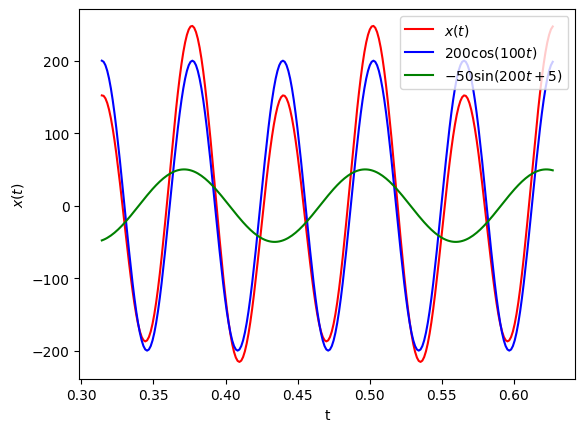

F1=15.915494309189533 hz F2=7.957747154594767 hz FS=795.7747154594766 hz


In [7]:
#T=pi/5
import numpy as np
import matplotlib.pyplot as plt

#DEFINIR PARAMETROS DE LA SEÑAL siempre asignar las variables
A1=200 #amplitud
A2= 50  #amplitud
w1=100 #frec angular
w2=50
T1=2*np.pi/w1 #periodo
T2=2*np.pi/w2
F1=w1/(2*np.pi) #frec
F2=w2/(2*np.pi)
phi2=5 #desfase

#frecuencia de muestreo minima #DEFINIR FRECUENCIA DE MUESTREO SEGUN NYSQUIST
FS=50*max(F1,F2) #50 es el numero de palitos mas de 2

#PERIODO SEÑAL CUASIPERIODICA T=MCM(T1,T2)
T= np.pi/50

#DEFINIR VECTOR DE TIEMPO
#ti=-2*T #DOS PERIODOS ATRAS Y DOS PERIODOS ADELANTE
#tf=3*T
ti=5*min(T1,T2) #DOS PERIODOS ATRAS Y DOS PERIODOS ADELANTE
tf=5*max(T1,T2)
tv= np.arange(ti,tf,1/FS) #VECTOR DE TIEMPO

#CONSTRUIR SEÑAL
x=A1*np.cos(w1*tv) -50*np.sin(w2*tv+phi2)
xc=A1*np.cos(w1*tv)
xs=-A2*np.sin(w2*tv+phi2)

plt.plot(tv,x,"r", label="$x(t)$")
plt.plot(tv,xc,"b", label="$200\cos(100t)$")
plt.plot(tv,xs,"g", label="$-50\sin(200t+5)$")

plt.legend()
plt.xlabel("t")
plt.ylabel("$x(t)$")
plt.show()

print(f"F1={F1} hz F2={F2} hz FS={FS} hz")

In [8]:
y_min = 0 # valor min después de cero y pendiente
y_max = 5 # valor max después de cero y pendiente
#crear funcion en python
def my_ceropen(x,ymin = -5, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

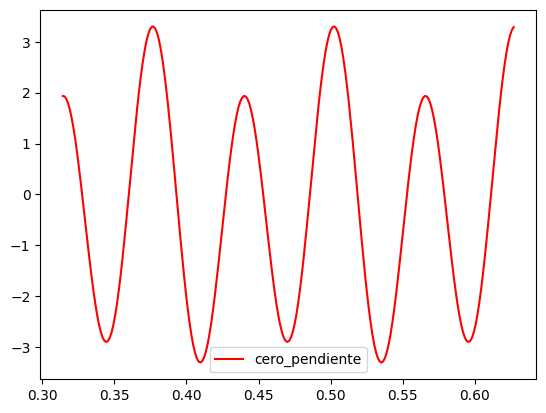

In [9]:
ymin=-3.3
ymax=3.3
xcp =my_ceropen(x,ymin=ymin, ymax=ymax)
plt.plot(tv,xcp,c="r",label="cero_pendiente")
plt.legend()
plt.show()

In [14]:
from scipy.spatial.distance import cdist
#función cuantización punto a punto

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

nbits=4
num_est=2**nbits
vq= np.linspace(ymin,ymax,num_est)
vq

d = cdist(xcp.reshape(-1,1),vq.reshape(-1,1)) #se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist
d.shape

(250, 16)

In [16]:
#se requiere identificar el elemento ve[j] más cercano a y[i] para genera señal cuantizada
ind = np.argmin(d,axis=1) #el parámetro axis = 1 indica que busca la posición a lo largo de las columnas del elemento más pequeño en cada fila
ind

array([12, 12, 12, 12, 11, 11, 10, 10,  9,  9,  8,  7,  7,  6,  5,  4,  4,
        3,  3,  2,  2,  1,  1,  1,  1,  1,  1,  1,  2,  2,  3,  3,  4,  5,
        5,  6,  7,  8,  9, 10, 11, 11, 12, 13, 13, 14, 14, 15, 15, 15, 15,
       15, 15, 14, 14, 14, 13, 12, 12, 11, 10,  9,  8,  7,  6,  6,  5,  4,
        3,  2,  2,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  2,  2,  3,
        4,  4,  5,  6,  7,  7,  8,  9, 10, 10, 11, 11, 11, 12, 12, 12, 12,
       12, 12, 11, 11, 10, 10,  9,  9,  8,  7,  7,  6,  5,  4,  4,  3,  3,
        2,  2,  1,  1,  1,  1,  1,  1,  1,  2,  2,  3,  3,  4,  5,  5,  6,
        7,  8,  9, 10, 11, 11, 12, 13, 13, 14, 14, 15, 15, 15, 15, 15, 15,
       14, 14, 14, 13, 12, 12, 11, 10,  9,  8,  7,  6,  6,  5,  4,  3,  2,
        2,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  2,  2,  3,  4,  4,
        5,  6,  7,  7,  8,  9, 10, 10, 11, 11, 11, 12, 12, 12, 12, 12, 12,
       11, 11, 10, 10,  9,  9,  8,  7,  7,  6,  5,  4,  4,  3,  3,  2,  2,
        1,  1,  1,  1,  1

In [17]:
print(xcp[1],ind[1],vq[ind[1]])

1.9262166384675816 12 1.9800000000000004


In [18]:
#recorrer vector cero y spam discretizado para cuantizar

for i in range(xcp.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(xcp[i],vq)
   else:
     yq = np.append(yq,my_cuantizador(xcp[i],vq)) #apilar datos cuantizando si i>0

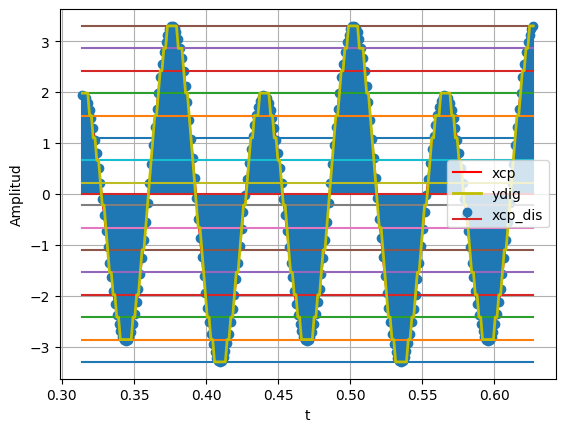

In [20]:
#graficar señales

plt.plot(tv,xcp,c='r', label='xcp')#cs continua

plt.stem(tv,xcp, label='xcp_dis')#cs discreta

#estados de cuantización

for v in vq:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()